# K-means via Mckay

## Hard K-Means

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import torch
import torch.distributions as dist
import warnings
import time

#### Generate data from a gaussian

In [73]:
N = 100 # number of data points in each cluster
K = 6 # number of clusters  = c/2
locs = [np.random.randint(0,2*K) for i in range(0,K)]
scales = [np.random.uniform() for i in range(0,K)]
samples = np.random.normal(loc=locs, scale=scales, size=(N, K))

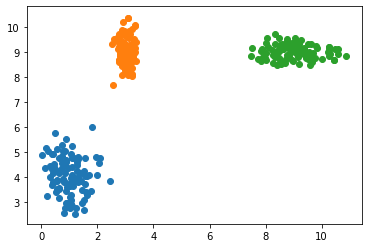

In [74]:
count = 0
for i in range(int(K/2)):
    # plot [x_i, y_i] pairs of points
    plt.scatter(samples[:,i+count], samples[:,i+1+count], label='cluster {}'.format(i))
    count += 1
# plt.legend()

#### K-Means

In [69]:
x=  th.tensor(samples)
dtype = 'float32' 
torchtype = {'float32': torch.float32, 'float64': torch.float64}

In [70]:
def KMeans(x, K=10, Niter=10, verbose=True):
    N, D = x.shape  # Number of samples, dimension of the ambient space

    # K-means loop:
    # - x  is the point cloud,
    # - cl is the vector of class labels
    # - c  is the cloud of cluster centroids
    start = time.time()
    c = x[:K, :].clone()  # Simplistic random initialization
    x_i = x[:, None, :]  # (Npoints, 1, D)

    for i in range(Niter):

        c_j = c[None, :, :]  # (1, Nclusters, D)
        D_ij = ((x_i - c_j) ** 2).sum(-1)  # (Npoints, Nclusters) symbolic matrix of squared distances
        cl = D_ij.argmin(dim=1).long().view(-1)  # Points -> Nearest cluster

        Ncl = th.bincount(cl).type(torchtype[dtype])  # Class weights
        for d in range(D):  # Compute the cluster centroids with torch.bincount:
            c[:, d] = th.bincount(cl, weights=x[:, d]) / Ncl

    end = time.time()

    if verbose:
        print("K-means example with {:,} points in dimension {:,}, K = {:,}:".format(N, D, K))
        print('Timing for {} iterations: {:.5f}s = {} x {:.5f}s\n'.format(
                Niter, end - start, Niter, (end-start) / Niter))

    return cl, c

K-means example with 100 points in dimension 4, K = 3:
Timing for 1000 iterations: 0.30642s = 1000 x 0.00031s

tensor([0, 1, 2, 3, 4, 4, 3, 4, 1, 1, 1, 1, 1, 1, 0, 3, 1, 4, 0, 2, 1, 2, 4, 1,
        1, 1, 3, 4, 4, 3, 1, 3, 2, 1, 1, 1, 0, 2, 1, 2, 4, 2, 1, 1, 2, 2, 3, 4,
        1, 4, 2, 1, 4, 4, 1, 4, 0, 2, 4, 1, 4, 2, 1, 2, 1, 2, 0, 3, 0, 3, 2, 1,
        0, 0, 3, 3, 0, 3, 1, 3, 1, 1, 3, 2, 1, 1, 0, 0, 1, 1, 1, 4, 1, 4, 1, 0,
        2, 1, 3, 3]) tensor([[ 0.5929,  1.1290,  3.1981,  2.1463],
        [-0.3352, -0.7016,  3.7646,  2.0062],
        [-0.1695, -0.2710,  2.2823,  1.9894]], dtype=torch.float64)


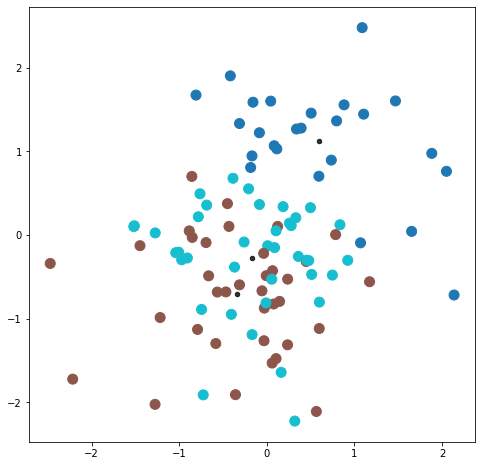

In [82]:
cl, c = KMeans(x,int(K/2),1000)
print(c1,c)
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=cl, s= 10000 / len(x), cmap="tab10")
plt.scatter(c[:, 0], c[:, 1], c='black', s=20, alpha=.8)
# plt.axis([0,25,0,20]) ;
plt.show()

Hmm, I think I'll have to review this later at some point. This is not clustering correctly. 